In [44]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore', np.RankWarning)

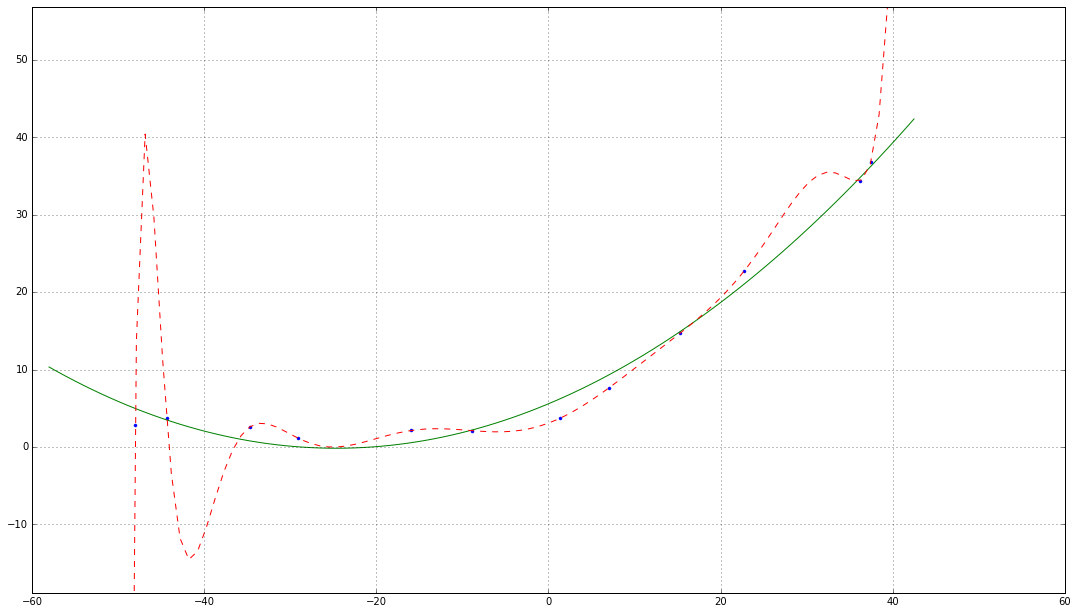

In [46]:
dam_data = loadmat('ex5data1.mat')


x = dam_data['X'].ravel()
y = dam_data['y'].ravel()


# x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
# y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 2)
# param_octave = np.array([[11.2176],[11.2813],[14.7554],[11.4739],[-12.4539],[-15.3507],[7.6451], [3.9019],[-4.9419]])
p = np.poly1d(z)

p30 = np.poly1d(np.polyfit(x, y, 30))

xp = np.linspace(x.min()-10, x.max()+5, 100)
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(y.min()-20, y.max()+20)


fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
#plt.autoscale(tight=True)
plt.grid()
plt.show()

In [36]:
# learning curve

In [42]:
z8 = np.polyfit(x, y, 8)
print z8

[  2.48086121e-12   3.20231465e-10   1.83546894e-09  -8.28005457e-07
  -1.63982619e-05   6.27035203e-04   2.40967156e-02   3.18286935e-01
   3.61273121e+00]


In [87]:
def poly_features(features, dimension):
    new_features = np.zeros((features.size, dimension))
    for i in np.arange(dimension):
        new_features[:,i] = np.power(features,i+1)
    else:
        return new_features
    
def linear_reg_cost_function(hX, y):
    m = y.size
    return np.sum((hX-y)**2)/(2*m) 

0.029 53.853


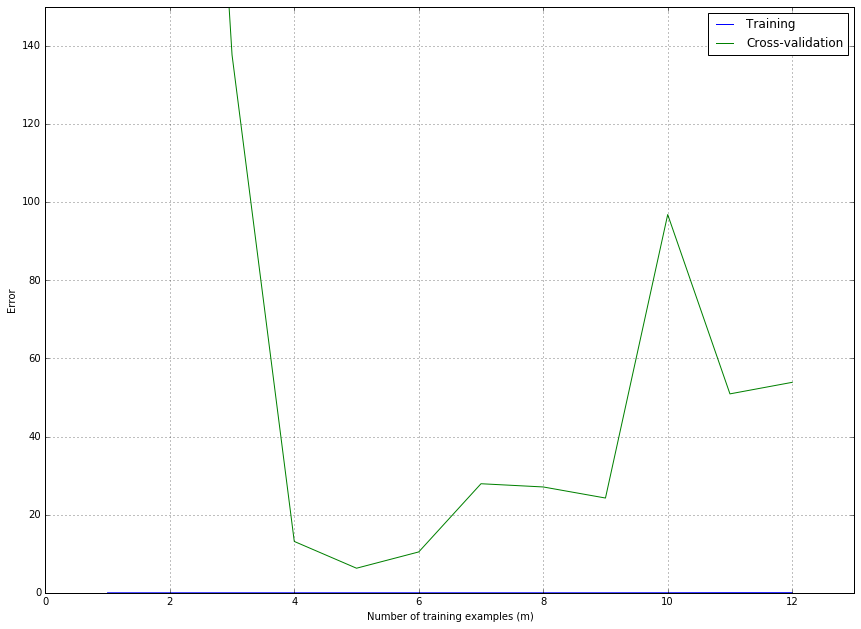

In [118]:
Xtrain = dam_data['X'].ravel()
ytrain = dam_data['y'].ravel()

Xval = dam_data['Xval'].ravel()
yval = dam_data['yval'].ravel()

J_train_values = list()
J_cv_values = list()
for i in np.arange(1, ytrain.size+1):
    p = np.poly1d(np.polyfit(Xtrain[:i], ytrain[:i], 8))
    J_train = linear_reg_cost_function(p(Xtrain[:i]), ytrain[:i])
    J_cv    = linear_reg_cost_function(p(Xval), yval)
    
    J_train_values.append(J_train)
    J_cv_values.append(J_cv)
    #print 3*'-', J_train,3*'-', J_cv
else:
    print J_train.round(3), np.abs(J_train-J_cv).round(3)
    
plt.plot(np.arange(1, ytrain.size+1), J_train_values, label='Training')
plt.plot(np.arange(1, ytrain.size+1), J_cv_values, label='Cross-validation')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
#fig.savefig('test2png.png', dpi=100)
#plt.autoscale(tight=True)

plt.xlabel('Number of training examples (m)')
plt.ylabel('Error')
plt.grid()
plt.axis([0, 13, 0, 150])
plt.show()